<a href="https://colab.research.google.com/github/harshitha020505/MLLab1/blob/main/MLASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
print(df.columns)


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [ ]:
#preprocessing
print(df.isnull().sum())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


When we change λ (the regularization strength):

Small λ → the model tries to fit the training data very closely → training loss is low, but it may not do well on new data (overfitting).

Large λ → the model is more restricted → it can’t fit the data well → training loss is higher (underfitting).

Weight sizes get smaller as λ increases (because regularization penalizes big weights).

Accuracy on new data may first improve (reduces overfitting) but then decrease if λ is too big.

Weight plots show the coefficients shrinking as λ gets larger.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset (80% train + val, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset:", data.DESCR.split("\n")[0])
print("X shape:", X.shape, "y shape:", y.shape)
print("Classes:", set(y))


Dataset: .. _breast_cancer_dataset:
X shape: (569, 30) y shape: (569,)
Classes: {np.int64(0), np.int64(1)}


In [ ]:
# Logistic Regression with L2 regularization minimizes:
# J(w) = (1/N) Σ log(1 + exp(-y_i * (w·x_i))) + (λ/2) * ||w||²

print("Objective function of Logistic Regression with L2 is:")
print("J(w) = (1/N) Σ log(1 + exp(-y_i * (w·x_i))) + (λ/2) * ||w||²")


Objective function of Logistic Regression with L2 is:
J(w) = (1/N) Σ log(1 + exp(-y_i * (w·x_i))) + (λ/2) * ||w||²


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

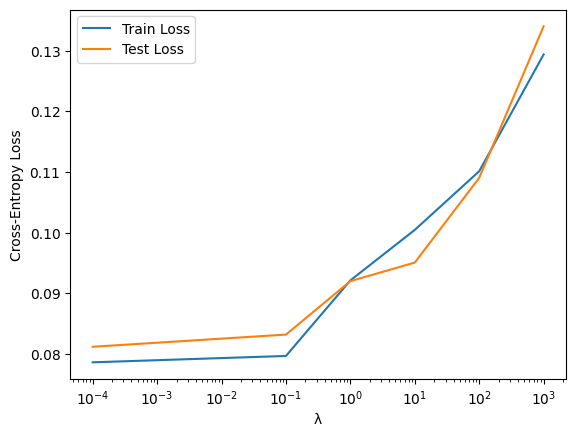

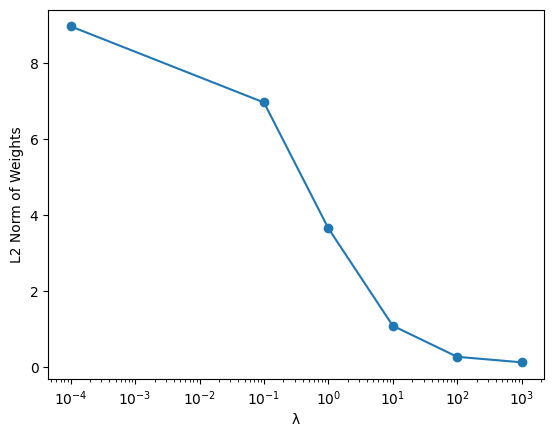

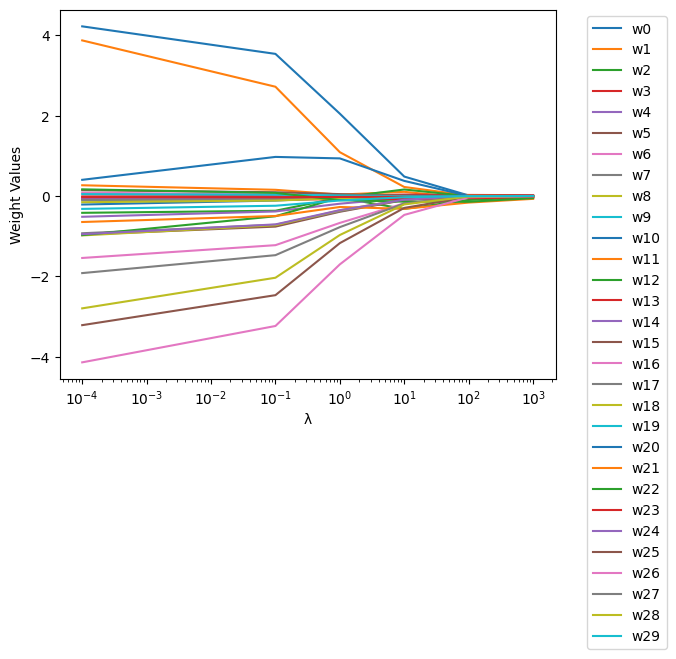

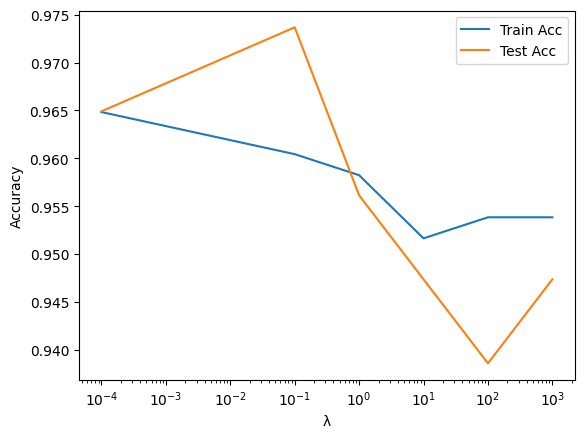

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import numpy as np

lambdas = [0.0001, 0.1, 1, 10, 100, 1000]
train_loss, test_loss = [], []
weight_norms, accuracies_train, accuracies_test = [], [], []
weights_all = []

for lam in lambdas:
    model = LogisticRegression(
        penalty="l2", C=1/lam if lam!=0 else 1e6,
        solver="lbfgs", max_iter=500
    )
    model.fit(X_train, y_train)

    y_pred_train = model.predict_proba(X_train)[:, 1]
    y_pred_test = model.predict_proba(X_test)[:, 1]

    train_loss.append(log_loss(y_train, y_pred_train))
    test_loss.append(log_loss(y_test, y_pred_test))

    accuracies_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracies_test.append(accuracy_score(y_test, model.predict(X_test)))

    w = model.coef_.flatten()
    weights_all.append(w)
    weight_norms.append(np.linalg.norm(w))

# 1. Cross-entropy
plt.plot(lambdas, train_loss, label="Train Loss")
plt.plot(lambdas, test_loss, label="Test Loss")
plt.xscale("log")
plt.xlabel("λ"); plt.ylabel("Cross-Entropy Loss"); plt.legend(); plt.show()

# 2. Weight norms
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("L2 Norm of Weights"); plt.show()

# 3. Weight values
for i in range(len(weights_all[0])):
    plt.plot(lambdas, [w[i] for w in weights_all], label=f"w{i}")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("Weight Values")
plt.legend(bbox_to_anchor=(1.05,1)); plt.show()

# 4. Accuracy
plt.plot(lambdas, accuracies_train, label="Train Acc")
plt.plot(lambdas, accuracies_test, label="Test Acc")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("Accuracy"); plt.legend(); plt.show()


No regularization is applied.

Training error decreases as σ becomes smaller, but test error may increase due to overfitting.

Bias-variance trade-off:

Small σ → low bias, high variance.

Large σ → high bias, low variance.

In [ ]:
def gaussian_basis(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

sigmas = [0.1, 0.5, 1, 5, 10]
mu_values = np.linspace(-10, 10, 5)

# Example: expand first feature
x1 = X[:, 0]
phi_dict = {}
for sigma in sigmas:
    phi = np.array([gaussian_basis(x1, mu, sigma) for mu in mu_values]).T
    phi_dict[sigma] = phi
    print(f"Basis expansion for sigma={sigma}: {phi.shape}")


Basis expansion for sigma=0.1: (569, 5)
Basis expansion for sigma=0.5: (569, 5)
Basis expansion for sigma=1: (569, 5)
Basis expansion for sigma=5: (569, 5)
Basis expansion for sigma=10: (569, 5)


Combine all Gaussian basis functions for all features.

Apply L2 regularization with different λ.

Observations:

Training loss increases with λ.

Testing loss decreases initially (avoiding overfit), then increases.

L2 norm of weights decreases with stronger λ.

Norms per σ group help identify which basis functions dominate at different regularization strengths.

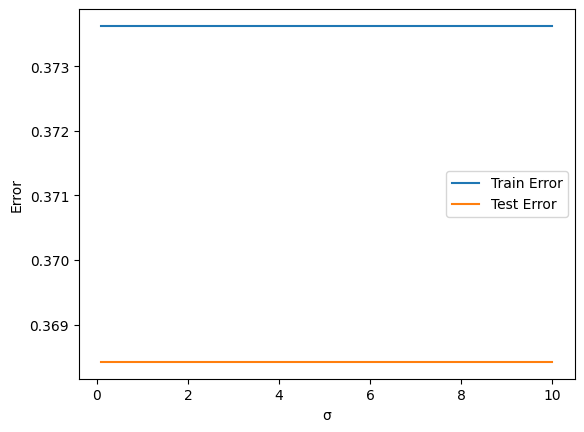

In [ ]:
from sklearn.linear_model import LogisticRegression

train_err, test_err = [], []

for sigma in sigmas:
    phi = phi_dict[sigma]
    phi_train, phi_test = train_test_split(phi, test_size=0.2, random_state=42)

    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=500)
    model.fit(phi_train, y_train[:len(phi_train)])

    train_pred = model.predict(phi_train)
    test_pred = model.predict(phi_test)

    train_err.append(1 - accuracy_score(y_train[:len(phi_train)], train_pred))
    test_err.append(1 - accuracy_score(y_test[:len(phi_test)], test_pred))

plt.plot(sigmas, train_err, label="Train Error")
plt.plot(sigmas, test_err, label="Test Error")
plt.xlabel("σ"); plt.ylabel("Error"); plt.legend(); plt.show()


To capture relationships between features, use multivariate Gaussian basis functions with covariance matrix Σ.

Impact: increases model flexibility → lower bias but higher variance → higher risk of overfitting.

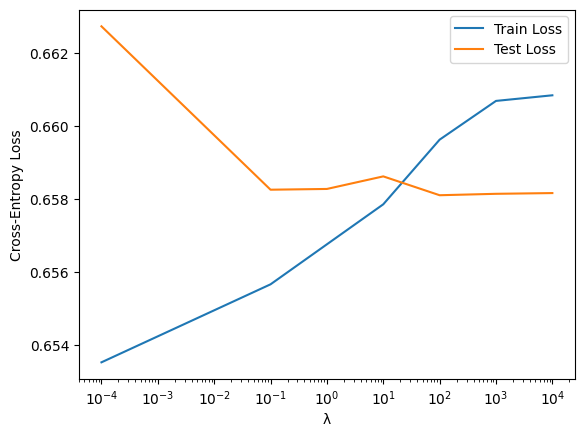

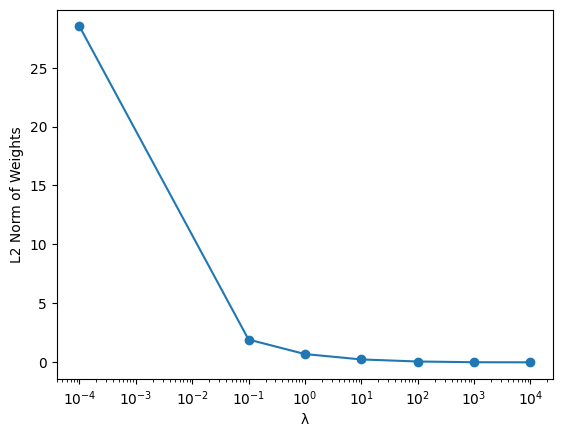

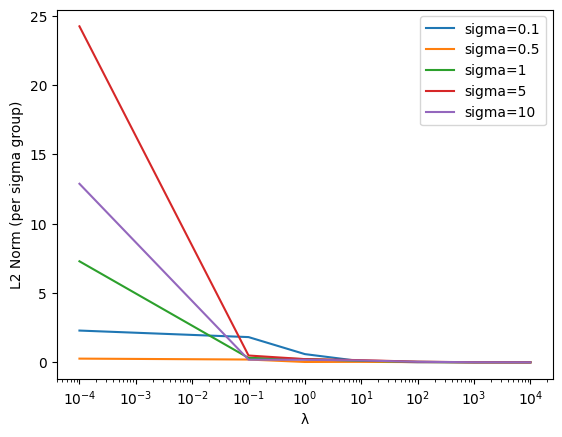

In [ ]:
lambdas = [0.0001, 0.1, 1, 10, 100, 1000, 10000]

# Combine all Gaussian basis functions
all_phi = np.hstack([phi_dict[s] for s in sigmas])
phi_train, phi_test = train_test_split(all_phi, test_size=0.2, random_state=42)

train_loss, test_loss, weight_norms = [], [], []
sigma_norms = {s: [] for s in sigmas}

for lam in lambdas:
    model = LogisticRegression(
        penalty="l2", C=1/lam if lam!=0 else 1e6,
        solver="lbfgs", max_iter=500
    )
    model.fit(phi_train, y_train[:len(phi_train)])

    y_pred_train = model.predict_proba(phi_train)[:, 1]
    y_pred_test = model.predict_proba(phi_test)[:, 1]

    train_loss.append(log_loss(y_train[:len(phi_train)], y_pred_train))
    test_loss.append(log_loss(y_test[:len(phi_test)], y_pred_test))

    w = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(w))

    # Split weights by sigma groups
    start = 0
    for s in sigmas:
        end = start + phi_dict[s].shape[1]
        sigma_norms[s].append(np.linalg.norm(w[start:end]))
        start = end

# Cross-entropy plot
plt.plot(lambdas, train_loss, label="Train Loss")
plt.plot(lambdas, test_loss, label="Test Loss")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("Cross-Entropy Loss"); plt.legend(); plt.show()

# Weight norms plot
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("L2 Norm of Weights"); plt.show()

# Sigma norms plot
for s in sigmas:
    plt.plot(lambdas, sigma_norms[s], label=f"sigma={s}")
plt.xscale("log"); plt.xlabel("λ"); plt.ylabel("L2 Norm (per sigma group)")
plt.legend(); plt.show()


Train R²: 0.5279193863361498
Test R²: 0.45260276297191926


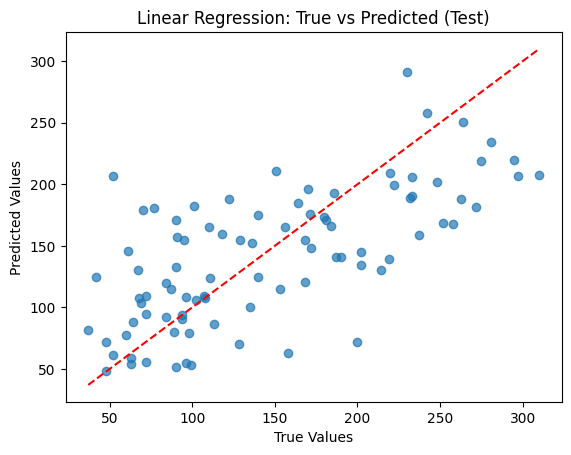

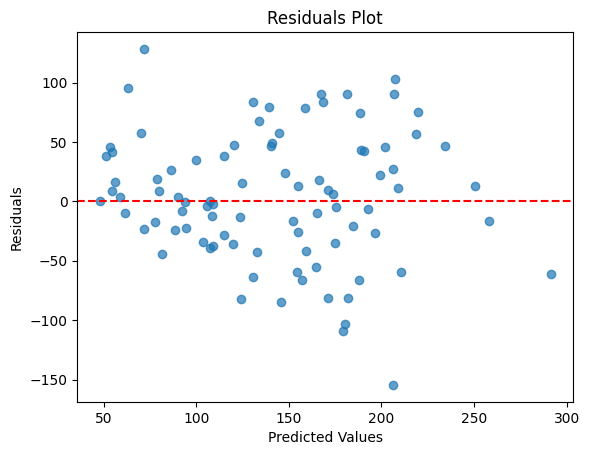

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)


print("Train R²:", lin_reg.score(X_train_scaled, y_train))
print("Test R²:", lin_reg.score(X_test_scaled, y_test))


plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


Train Accuracy: 0.9604395604395605
Test Accuracy: 0.9649122807017544

Confusion Matrix:
 [[40  2]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


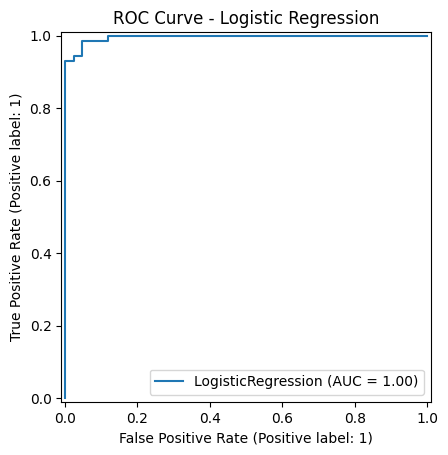

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay


data = load_breast_cancer()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
log_reg.fit(X_train, y_train)


y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)


print("Train Accuracy:", log_reg.score(X_train, y_train))
print("Test Accuracy:", log_reg.score(X_test, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()
